### NLP Assignment 3
#### January 2020

###### Name: W.D. Wattearachchi
###### Index No.: 15001415

### Answer (a)

Answer for question (a) will be discussed under the below sections as 
<ol>
    <li>Reading the data file</li>
    <li>Removing any remaining irrelevant content such as non-alphanumeric characters and possible extraneous html tags</li> 
    <li>Tokenizing the text by separating into individual words</li>
    <li>Convert the case of the ‘Singlish’ tokens to obtain unique words</li>
    <li>Separate the data into two sets – one for Sinhala and the other for ‘Singlish’ entries</li>
 </ol>

#### a.1. Reading the data file

In [2]:
# Read the csv data file given, into a Pandas dataframe
import pandas as pd

dataframe = pd.read_csv("Sinhala_Singlish_Hate_Speech.csv")

# Display the first five rows of the dataset
dataframe.head(10)

,PhraseNo,Phrase,IsHateSpeech
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES
5,6,"හැබැයි ඒ මේ ආණ්ඩුවේ විතරක් නෙවෙයි , රට හූරාගෙන...",YES
6,7,ලංකාව මොකක්ද.. මෙිකෙ ඉන්නෙ වාහනයක් ගත්තම අලි ඔ...,YES
7,8,Menna ratawal menna minissu. ape ratawal wala ...,YES
8,9,උඹ ලෝකයක් ඉස්සරහ හදාගත්ත නම්බුව ලංකාවේ කාලකණ්ණ...,YES
9,10,පල්ලියකට ගලක් වැදුනත් පරසක්වල ගහන මූ පන්සල් බි...,YES


<p>Above are the first five rows of the pandas dataframe.</p>

#### a.2.  Removing any remaining irrelevant content such as non-alphanumeric characters and possible extraneous html tags

<p>The below function named <b>clean_data(data)</b> will define a pattern, so that it will be used later to replace the non-alphanumeric characters and extraneous html tags from the dataframe.</p>

In [3]:
import re

# Define a function to remove any remaining irrelevant content such as 
# non-alphanumeric characters and possible extraneous html tags
def clean_data(data):
    
    # Define a pattern to filter non-alphanumeric characters using unicode
    pattern_non_alphanumeric = re.compile(u'[^\u0061-\u007A | ^\u0041-\u005A | ^\u0D80-\u0DFF | ^\u0030-\u0039]', re.UNICODE)
    # Apply the above defined pattern and replace the matched patterns with a 'space'
    data = [pattern_non_alphanumeric.sub(' ', x) for x in data.tolist()]
    
    # Define a pattern to detect HTML tags
    pattern_html  = re.compile('<.*?>|&(a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    # Apply the above defined pattern and replace the matched patterns with a 'space'
    data = [pattern_html.sub(' ', x) for x in data]
    
    return data

# Cleaning the data in the 'Phrase' column
dataframe['Phrase'] = clean_data(data=dataframe['Phrase'])
dataframe

,PhraseNo,Phrase,IsHateSpeech
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO
3,4,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES
...,...,...,...
2495,2496,ඔය දෙන්නා එකතු වෙලා tv program එකක් කරන්නකො ත...,NO
2496,2497,කවුරු මොනා කිව්වත් ඔයාල දෙන්නගෙ කටවල් දෙකට...,NO
2497,2498,ඇස්වහ කටවහක් නෑ ඔයාලා දෙනාටම හැමදාමත් අපිව සතු...,NO
2498,2499,මුන් දෙන්න තමයි රෙඩියෝ එකේ සුපිරි ඩබල හිරු ඉන...,NO


<p>After applying the function the irrelevent symbols and characters will be removed as defined by the pattern. When removing non-alphanumeric characters the pattern will <b>ignore</b> words with lowercase English characters - a-z (u0061-u007A), upddercase English characters - A-Z (u0041-u005A), Sinhala characters (u0D80-u0DFF) and numbers  0-9 (u0030-u0039). Also another patter was used to remove the HTML/XML tags with characters in between the parenthesis. Above is the dataset which obtained after removing irrelevant content such as non-alphanumeric characters and possible extraneous html tags.</p>

#### 3. Tokenizing the text by separating into individual words 

<p>From this point onwards, the NLTK library will be used for symbolic and statistical natural language processing. Below function named <b>tokenize_data(dataframe, column)</b>  will tokenize each and every sentence in the dataframe using word_tokenize() function in NLTK.</p>

In [4]:
import nltk

# Define a function to tokenize the dataset when the dataframe and 
# the particular column name which consists the data were given
def tokenize_data(dataframe, column):
    
    # Applying the word_tokenize function from NLTK to each row -'column' field, in order to tokenize the words.
    dataframe[column] = dataframe.apply(lambda row: nltk.word_tokenize(row[column]), axis=1)
    
    return dataframe[column]

# Tokenizing the data in the 'Phrase' column
dataframe['Phrase'] = tokenize_data(dataframe, 'Phrase')
dataframe

,PhraseNo,Phrase,IsHateSpeech
0,1,"[මේ, බැල්ලි, කොටින්ගේ, ගු, කනකොට, අපහසුවක්, දැ...",YES
1,2,"[මන්, ඊයේ, මුස්ලිම්, ඩෑල්, එකක්, එක්ක, සෙල්ෆිය...",YES
2,3,"[සංහිදියාවට, අවුලක්, වෙයි, ද]",NO
3,4,"[කටින්, පුරසාරම්, දොඩන, අපි, සිංහලයො, විදියට, ...",YES
4,5,"[මචන්, ඔය, මගුල, නවත්තලා, කොන්දක්, තියෙනවානම්,...",YES
...,...,...,...
2495,2496,"[ඔය, දෙන්නා, එකතු, වෙලා, tv, program, එකක්, කර...",NO
2496,2497,"[කවුරු, මොනා, කිව්වත්, ඔයාල, දෙන්නගෙ, කටවල්, ද...",NO
2497,2498,"[ඇස්වහ, කටවහක්, නෑ, ඔයාලා, දෙනාටම, හැමදාමත්, අ...",NO
2498,2499,"[මුන්, දෙන්න, තමයි, රෙඩියෝ, එකේ, සුපිරි, ඩබල, ...",NO


<p>As shown above, the each and every row, <b>"Phrase"</b> field of the dataframe now consists of tokenized sentences. (Now those have become lists)</p>

#### 4. Convert the case of the ‘Singlish’ tokens to obtain unique words

<p>Below function named <b>convert_case(dataframe, column)</b> will convert the case of the Singlish tokens to lowercase.</p>

In [ ]:
# Define a function to convert Singlish tokens to lowercase when the dataframe and 
# the particular column name which consists the data were given
def convert_case(data, column):

    # Iterating through each tokenized sentence in the dataframe
    for index, row in data.iterrows():
        # Convert each word of the 'column' field in a tokenized sentence to lowercase, and replace the whole 'column' with
        # the lowercased (converted) one
        row[column] = [w.lower( ) for w in row[column]]
        data[column][index] = row[column]
    
    return data[column]

# Convert the Singlish tokens in the 'Phrase' column to lowercase
dataframe['Phrase'] = convert_case(data=dataframe, column='Phrase')
dataframe

c:\users\wasura dananjith\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PhraseNo,Phrase,IsHateSpeech
0,1,"[මේ, බැල්ලි, කොටින්ගේ, ගු, කනකොට, අපහසුවක්, දැ...",YES
1,2,"[මන්, ඊයේ, මුස්ලිම්, ඩෑල්, එකක්, එක්ක, සෙල්ෆිය...",YES
2,3,"[සංහිදියාවට, අවුලක්, වෙයි, ද]",NO
3,4,"[කටින්, පුරසාරම්, දොඩන, අපි, සිංහලයො, විදියට, ...",YES
4,5,"[මචන්, ඔය, මගුල, නවත්තලා, කොන්දක්, තියෙනවානම්,...",YES
...,...,...,...
2495,2496,"[ඔය, දෙන්නා, එකතු, වෙලා, tv, program, එකක්, කර...",NO
2496,2497,"[කවුරු, මොනා, කිව්වත්, ඔයාල, දෙන්නගෙ, කටවල්, ද...",NO
2497,2498,"[ඇස්වහ, කටවහක්, නෑ, ඔයාලා, දෙනාටම, හැමදාමත්, අ...",NO
2498,2499,"[මුන්, දෙන්න, තමයි, රෙඩියෝ, එකේ, සුපිරි, ඩබල, ...",NO


<p>As explained in the comments, as we have tokenized the sentences from the previous step, the dataframe now consists of tokenized sentences (in list format). So, each tokenized sentence were iterated and the each word was converted to lowercase irrespective of whether the word is 'Sinhala' or 'Singlish'. As shown in the result, the 'Sinhala' words were <b>not</b> harmed. <b>w.lower() has only converted the words with English characters to the lowercase</b>.</p>

#### 5. Separate the data into two sets – one for Sinhala and the other for ‘Singlish’ entries

<p>The below function named <b>check_sinhala_tokens(tokenized_sentence)</b> has the ability to decide the types of the tokens of a particular tokenized sentence when it is passed as an argument. The decision was made mainly by checking whether a particular word can be encoded with ASCII. Only the words with English characters can be encoded with ASCII and Sinhala characters <b>cannot</b> be encoded with ASCII. This is the criteria which was mainly used to seperate whether a tokenized sentence is Sinhala or Singlish as described by the comments of the below function.</p>

In [5]:
# Define a function to decide whether a tokenized sentence conisists of Sinhala words, Singlish words or both
def check_sinhala_tokens(tokenized_sentence):
    
    # A list was intiated to store the type of the tokens in a particular sentence
    sentence_token_types = []
    
    # Iterate through each sentence and get each token
    for token in tokenized_sentence:
        
        #  Check whether the token can be encoded only with ASCII characters
        try:
            token.encode(encoding='utf-8').decode('ascii')
            
        # If it can not be encoded, then it has characters from Sinhala alphabet
        except UnicodeDecodeError:
            sentence_token_types.append('Sinhala')
            
        # If it can  be encoded, then it has the characters from English alphabet 
        # Then it is a Sinhala written in English = Singlish
        else:
            sentence_token_types.append('Singlish')
            
    # If a particular sentence does not have Singlish words, it is a Sinhala sentence        
    if (sentence_token_types.count('Singlish') == 0):
        return "Sinhala"
    # If a particular sentence does not have Sinhala words, it is a Singlish sentence  
    elif (sentence_token_types.count('Sinhala') == 0):
        return "Singlish"
    # If a particular sentence has both Sinhala and Singlish words,then it is a Singlish(Both) sentence 
    else:
        return "Both"

<p>Two lists were initialized as <b>sinhala_sentences_list</b> and <b>singlish_sentences_list</b> in order to store the rows with Sinhala sentences and Singlish sentences seperately.</p>

In [6]:
# Define 2 empty lists to store Sinhala and Singlish data seperately
sinhala_sentences_list = []
singlish_sentences_list = []

# Iterating through each tokenized sentence in the dataframe
for index, row in dataframe.iterrows():
    
    # Check whether a tokenized sentence is Sinhala or Singlish and seperate the sentences to 2 lists
    if (check_sinhala_tokens(tokenized_sentence=row['Phrase']) == "Sinhala"):
        sinhala_sentences_list.append(dataframe.iloc[index])
    else:
        singlish_sentences_list.append(dataframe.iloc[index])

<p>The output of the above code segment is <b>2 lists</b> which consist Sinhala sentences and Singlish sentences seperately with their corresponding lables. <br><br> Since there is a need to write these to 2 seperate .csv files, the lists can be converted to dataframes as shown below.</p>

In [7]:
# Convert the created 2 lists to pandas dataframes
sinhala_dataframe = pd.DataFrame(sinhala_sentences_list)  
singlish_dataframe = pd.DataFrame(singlish_sentences_list)  

In [8]:
sinhala_dataframe

,PhraseNo,Phrase,IsHateSpeech
0,1,"[මේ, බැල්ලි, කොටින්ගේ, ගු, කනකොට, අපහසුවක්, දැ...",YES
1,2,"[මන්, ඊයේ, මුස්ලිම්, ඩෑල්, එකක්, එක්ක, සෙල්ෆිය...",YES
2,3,"[සංහිදියාවට, අවුලක්, වෙයි, ද]",NO
3,4,"[කටින්, පුරසාරම්, දොඩන, අපි, සිංහලයො, විදියට, ...",YES
4,5,"[මචන්, ඔය, මගුල, නවත්තලා, කොන්දක්, තියෙනවානම්,...",YES
...,...,...,...
2488,2489,"[ශ්, රී, ලාංකික, දේශය, සුන්දර, කරමු]",NO
2489,2490,"[ඕක, කලින්, අපි, නොදන්න, ලයිවු, එකේ, ගිය, එකක්]",NO
2493,2494,"[ඒත්, එහෙම, කියන්න, එපා, මට, තේරැනා, පැසී, අපහ...",NO
2496,2497,"[කවුරු, මොනා, කිව්වත්, ඔයාල, දෙන්නගෙ, කටවල්, ද...",NO


<p>Above is the dataframe which consists only the Sinhala sentences.</p>

In [9]:
singlish_dataframe

,PhraseNo,Phrase,IsHateSpeech
7,8,"[Menna, ratawal, menna, minissu, ape, ratawal,...",YES
11,12,"[paduway, hitahan, beri, weda, nokaran, bat, e...",YES
12,13,"[muth, kata, arinne, anik, unta, witharai, jat...",YES
13,14,"[songs, kanna, epa, buruwo, kochchara, lassana...",YES
14,15,"[Muth, nanna, yanne, kridakayanta, ground, wal...",YES
...,...,...,...
2492,2493,"[1002, ඔන්න, ඔයාව, subscribe, කරා, මාවත්, subs...",NO
2494,2495,"[අපේ, අලුත්, වීඩියෝ, එකත්, බලන්න, පෙන්ඩ්ස්, චැ...",NO
2495,2496,"[ඔය, දෙන්නා, එකතු, වෙලා, tv, program, එකක්, කර...",NO
2497,2498,"[ඇස්වහ, කටවහක්, නෑ, ඔයාලා, දෙනාටම, හැමදාමත්, අ...",NO


<p>Above is the dataframe which consists only the Singlish sentences.</p>

<p>Let us see the percentage of entries in the two sets.</p>

In [10]:
no_of_sinhala_sentences = len(sinhala_dataframe.index)
no_of_singlish_sentences = len(singlish_dataframe.index)
percentage_of_sinhala_sentences = (no_of_sinhala_sentences/(no_of_sinhala_sentences + no_of_singlish_sentences))*100
percentage_of_singlish_sentences = (no_of_singlish_sentences/(no_of_sinhala_sentences + no_of_singlish_sentences))*100

print ("Number of Sinhala sentences: "+str(no_of_sinhala_sentences))
print ("Number of Singlish sentences: "+str(no_of_singlish_sentences)+ "\n")
print ("Percentage of Sinhala sentences: "+str(percentage_of_sinhala_sentences) +"%")
print ("Percentage of Singlish sentences: "+str(percentage_of_singlish_sentences)+ "%\n")

Number of Sinhala sentences: 1393
Number of Singlish sentences: 1107

Percentage of Sinhala sentences: 55.720000000000006%
Percentage of Singlish sentences: 44.28%



<p>Below code segment will write the sinhalaDataframe to a .csv file named <b>'Sinhala_Hate_Speech.csv'</b> and singlishDataframe to a .csv file named <b>'Singlish_Hate_speech.csv'</b> by encoding with utf-8-sig.</p>

In [11]:
# Write the created 2 dataframes to 2 seperate .csv files
sinhala_dataframe.to_csv('Sinhala_Hate_Speech.csv',encoding="utf-8-sig")
singlish_dataframe.to_csv('Singlish_Hate_Speech.csv',encoding="utf-8-sig")

### Answer (b)

Answer for question (b) will be discussed under the below sections as 
<ol>
    <li>Functions to calculate the number of tokens/unique tokens, minimum/maximum sentence lengths and visulaize different sentence lengths</li>
    <li>Removing stop words</li> 
    <li>Stemming</li>
 </ol>

#### b.1. Functions to calculate the number of tokens/unique tokens, minimum/maximum sentence lengths and visulaize different sentence lengths

<p>Three main functions were defined to fulfill above purposes. <br><br>The first function <b>get_no_of_tokens_and_unique_tokens(dataframe, column)</b> is defined below which has the ability to find the number of tokens and the number of unique tokens in the corpus and print those values when any dataframe is passed as the argument.</p>

In [12]:
from itertools import chain

# Define a function to count the number of tokens and unique tokens in the dataset  
# when the dataframe and the column name which consists the tokens were given
def get_no_of_tokens_and_unique_tokens(dataframe, column):
    
    # Iterate through the dataset and and get all the tokens to one list
    tokenList = list(chain(*dataframe[column]))

    # Calculate and print the total number of tokens in the dataset
    print ("Number of total tokens: " + str(len(tokenList)))
    
    # Calculate and print the number of unique tokens in the dataset using the 'set' function
    print ("Number of unique tokens: "+ str(len(set(tokenList))) + "\n")

<p>The second function <b>find_min_max_length_sentence(dataframe, column)</b> is defined below which has the ability to find the minimum and maxiumum lengths of the sentences in the dataset and print those values when any dataframe is passed as the argument. <b>find_min_max_length_sentence(dataframe, column)</b> will call <b>get_lengths_of_sentences(dataframe, column)</b> inside itself to calculate all the lengths of the sentences and return a list when the dataframe and the column name which consists the sentences were given</p>

In [13]:
# Define a function to find the minimum and maxiumum lengths of the sentences in the dataset
# when the dataframe and the column name which consists the sentences were given
def find_min_max_length_sentence(dataframe, column):
    
    # Calculate all the lengths of the sentences and store them in a list
    lengths = get_lengths_of_sentences(dataframe, column)
    
    # Print the minimum sentence length
    print ("Minimum sentence length: " + str(min(lengths)))
    
    # Print the maximum sentence length
    print ("Maximum sentence length: "+ str(max(lengths)) + "\n")
    
# Define a function to calculate all the lengths of the sentences and return a list
# when the dataframe and the column name which consists the sentences were given
def get_lengths_of_sentences(dataframe, column):
    
    # Initialized a list to store all the lengths
    lengths = []
    
    # Iterate through the dataset and get the length of each sentence in 'Phrase' column and add it to the lengths list
    for index, row in dataframe.iterrows():
        lengths.append(len(row[column]))
    return lengths

<p>Let us pass the sinhalaDataframe to the above functions and find the answers.</p>

In [14]:
get_no_of_tokens_and_unique_tokens(dataframe=sinhala_dataframe, column='Phrase')
find_min_max_length_sentence(dataframe=sinhala_dataframe, column='Phrase')

Number of total tokens: 25507
Number of unique tokens: 9105

Minimum sentence length: 2
Maximum sentence length: 104



<p>According to the above outputs, it can be seen that <b>before reducing the 'noise'</b> in the dataset, it consists of 25507 number of total tokens and out of that 9105 tokens are unique. Also, the minimum length of a sentence that can have is 2 which means it has only 2 tokens, and the maximum length is 104 which means it has 104 tokens.</p>

<p>The third function <b>visualize_different_sentence_lengths(dataframe, title, column)</b> is defined below which has the ability to plot a histogram to visualize different sentence lengths when any data frame is passed as the argument.</p>

In [15]:
import matplotlib.pyplot as plt
    
# Define a function to plot a histogram to visualize different sentence lengths in the dataset
# when the dataframe, title of the plot and the column name which consists the sentences were given
def visualize_different_sentence_lengths(dataframe, title, column):
    
    # Get all the lengths of sentences in the dataframe
    lengths = get_lengths_of_sentences(dataframe, column)

    # Number of bins was defined as 10 (you can change it if want)
    num_bins = 10
    
    # Plot the histogram
    n, bins, patches = plt.hist(lengths, num_bins, facecolor='orange', alpha=1)
    plt.xlabel('Sentence Length (Number of Words in a Sentence)')
    plt.ylabel('Number of Sentences')
    plt.title(title)
    plt.show()

<p>Let us pass the sinhalaDataframe to the above function and visualize the data.</p>

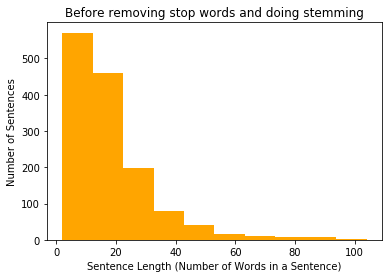

In [16]:
visualize_different_sentence_lengths(dataframe=sinhala_dataframe, 
                                     title='Before removing stop words and doing stemming', 
                                     column='Phrase')

<p>According to the above plot, it can be seen that <b>before reducing the 'noise'</b> in the dataset, most number of sentences have 0 to 10 number of words. If the x axis is divided into 2 halfs from 40, it can be seen that there are only fewer number of sentences that has more that 40 words.</p>

#### b.2. Removing stop words

<p>The first step of reducing the 'noise' in the dataset is to remove the stop words. First we need to find a stop words list. The below code segment will read 425 stop words from a .csv file and will make a list, so that it can be used as the stop word list in this scenario.</p>

In [19]:
# Read the .csv files which contains 425 stop words in Sinhala
stop_words = pd.read_csv('StopWords_425.csv',encoding='utf-8',header=None)
stop_words = stop_words[0].values.tolist()
stop_words[:20]

['ද',
 'ය',
 'මේ',
 'ඒ',
 'හා',
 'ම',
 'බව',
 'නම්',
 'දී',
 'සඳහා',
 'යි',
 'සහ',
 'ලෙස',
 'හෝ',
 'ඇත',
 'නිසා',
 'මෙම',
 'ව',
 'ගැන',
 'විසින්']

<p>The above stop word list was taken from <a href="http://ltrl.ucsc.lk">http://ltrl.ucsc.lk</a> website. Since stop words are a sub-branch of functional words in a language, <a href="http://ltrl.ucsc.lk/download-3">http://ltrl.ucsc.lk/download-3</a> consists of functional words that can be used. In that .rar file, there was a .txt file which consists of stop words for Sinhala which consists of 425 words as shown above. (The .txt file was manually converted to a .csv file to ease the use)</p> 

<p>The function <b>remove_stop_words(dataframe, stop_words, column)</b> is defined below which has the remove the stop words from the column 'Phrase' when the data frame is passed as the argument.</p>

In [20]:
# Define a function to remove stop words from the content in the 'Phrase' column
# when the dataframe, stop word list and the column name which consists the sentences were given
def remove_stop_words(dataframe, stop_words, column):
    
    # Iterate through the dataset by reading each row
    for index, row in dataframe.iterrows():
        
        # Initialized a list to add the non-stop words in the sentence in the current row
        token_list_without_stop_words = []
        
        # The current sentence is read
        token_list_with_stop_words = row[column]
        
        # Iterate through the tokens of the current sentence by reading each token
        for token in token_list_with_stop_words:
            
            # Check whether each token is a stop word or not
            if not token in stop_words:
                # If it is not a stop word add it to the list tokenListWithoutStopWords
                token_list_without_stop_words.append(token)       
    
        # Assign the content of 'Phrase' with the new list of tokens wihtout stop words
        dataframe[column][index] = token_list_without_stop_words

<p>Let us pass the sinhalaDataframe to the above function to remove the stop words.</p>

In [21]:
remove_stop_words(dataframe=sinhala_dataframe, stop_words=stop_words, column='Phrase')
sinhala_dataframe

ipykernel_launcher:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PhraseNo,Phrase,IsHateSpeech
0,1,"[බැල්ලි, කොටින්ගේ, ගු, කනකොට, අපහසුවක්, දැනුනෙ...",YES
1,2,"[මන්, ඊයේ, මුස්ලිම්, ඩෑල්, එකක්, සෙල්ෆියක්, ගත...",YES
2,3,"[සංහිදියාවට, අවුලක්, වෙයි]",NO
3,4,"[කටින්, පුරසාරම්, දොඩන, අපි, සිංහලයො, විදියට, ...",YES
4,5,"[මචන්, මගුල, නවත්තලා, කොන්දක්, තියෙනවානම්, පුල...",YES
...,...,...,...
2488,2489,"[ශ්, රී, ලාංකික, දේශය, සුන්දර, කරමු]",NO
2489,2490,"[ඕක, කලින්, අපි, නොදන්න, ලයිවු, එකේ, ගිය, එකක්]",NO
2493,2494,"[එහෙම, කියන්න, මට, තේරැනා, පැසී, අපහසුතාවයට, ප...",NO
2496,2497,"[මොනා, කිව්වත්, ඔයාල, දෙන්නගෙ, කටවල්, දෙකට, ගහ...",NO


<p>Above is the dataset that does not consists of stop words anymore.</p>

<p>Now, let us calculate the total number of tokens/unique tokens and the minimum/maximum length of a sentence again.</p>

In [22]:
get_no_of_tokens_and_unique_tokens(dataframe=sinhala_dataframe, column='Phrase')
find_min_max_length_sentence(dataframe=sinhala_dataframe, column='Phrase')

Number of total tokens: 22372
Number of unique tokens: 8868

Minimum sentence length: 1
Maximum sentence length: 94



<p>According to the above outputs, it can be seen that <b>after removing 'stop words'</b>, the data set consists of 22372 (previously it was 25507) number of total tokens and out of that 8868 (previously it was 9105) tokens are unique. Both these numbers have been reduced when comparing with previous step.<br>   
    
Also, the minimum length of a sentence that can have is 1 (previously it was 2) which means it has only 1 token, and the maximum length is 94 (previously it was 104) which means it has 94 tokens. Both these numbers have been reduced when comparing with previous situation.</p>

<p>Let us pass the sinhalaDataframe to the above function and visualize the data.</p>

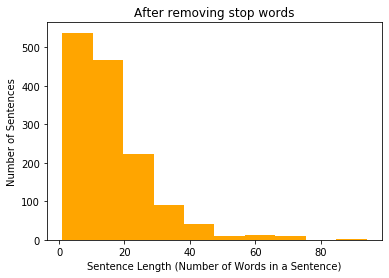

In [23]:
visualize_different_sentence_lengths(dataframe=sinhala_dataframe, 
                                     title='After removing stop words', 
                                     column='Phrase')

<p>According to the above plot, it can be seen that <b>after removing 'stop words'</b>, most sentences still have 0 to 10 number of words as shown previously. If the x axis is divided to 2 halfs from 40, it can be seen that there are only fewer number of sentences that has more that 40 words. Since the maximum length was reduced, the bin which consisted 100 was removed.</p>

#### b.3. Stemming

<p>The second step of reducing the 'noise' in the dataset is to do stemming. First we need to find a suffix list. The below code segment will read 413 suffixes from a .csv file and will make a list, so that it can be used as the suffix list to do stemming in this scenario.</p>

In [25]:
# Read the .csv files which contains 413 suffixes in Sinhala
suffixes_list = [line.rstrip('\n') for line in open('Suffixes-413.txt',encoding='utf-8')]
suffixes_list[:20]

['්',
 'ක',
 'ක්',
 'කක',
 'කක්',
 'කකට',
 'කකින්',
 'කකු',
 'කකුගෙන්',
 'කකුගේ',
 'කකුට',
 'කගෙ',
 'කගෙන්',
 'කගේ',
 'කට',
 'කා',
 'කාලා',
 'කාලාගෙන්',
 'කාලාගේ',
 'කාලාට']

<p>The above suffix list was taken from <a href="http://ltrl.ucsc.lk/download-3">http://ltrl.ucsc.lk/download-3</a>. In the .rar file, there was a .txt file which consists of siffixes for Sinhala which consists of 413 words as shown above.</p>
<p>The function <b>stem_words(dataframe, suffixes_list, column)</b> is defined below which will do stemming as explained by the comments in the code segement.</p>

In [26]:
# Define a function to remove suffixes from the content in the 'Phrase' column
# when the dataframe, suffixes list and the column name which consists the sentences were given
def stem_words(dataframe, suffixes_list, column):
    for index, row in dataframe.iterrows():
        
        # The current sentence is read
        token_list = row[column]
        
        # Iterate through the tokens of the current sentence by reading each token
        for index_in_token_list in range(0, len(token_list)):
            
            # Initialize an empty list to store all the possible stemmed words related to a particular token.
            # Later from this list, the particular stem which has the smallest length 
            # should be selected as the stemmed word (root).
            possible_stems = []
            
            # Iterate through the suffixes list
            for suffix in suffixes_list:
                
                # If the length of the token is less than the length of the suffix, 
                # then that suffix cannot occur inside that token
                # If the length of the token is greater than the length of the suffix, 
                # then that suffix may occur inside that token
                if (len(token_list[index_in_token_list]) > len(suffix)):
                    
                    # Check whether the suffix occur at the end of the token,
                    # if so, add the stemmed token to the possibleStems list
                    if (token_list[index_in_token_list][(-len(suffix)):] == suffix):
                        # Removing the suffix from the token and adding the stemmed token to the possibleStems list
                        possible_stems.append(token_list[index_in_token_list][:-len(suffix)])
            
            # 'possibleStems == []' means that the particular token cannot be stemmed. So no stemmed word for that token
            # If the possibleStems is not empty, then check for the token that has the least length
            if (possible_stems != []): 
                # Get the stemmed token which has the least length 
                # and replace the orginal(current) token with the stemmed token
                token_list[index_in_token_list] = min(possible_stems, key=len)
                
        # Replace the whole list with the new list with the stemmed tokens           
        dataframe[column][index] = token_list

<p>Let us pass the sinhalaDataframe to do stemming.</p>

In [27]:
stem_words(dataframe=sinhala_dataframe, suffixes_list=suffixes_list, column='Phrase')
sinhala_dataframe

ipykernel_launcher:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PhraseNo,Phrase,IsHateSpeech
0,1,"[බැල්ලි, කොටි, ග, කනකො, අපහසු, දැනුන, ද, ඔ, මි...",YES
1,2,"[ම, ඊ, මුස්ලි, ඩෑල, එ, සෙල්ෆි, ගත්ත, සහජීවන, ර...",YES
2,3,"[සංහිදියා, අවුල, වෙ]",NO
3,4,"[කට, පුරසාර, දොඩ, අපි, සිංහලය, විදි, ලැජ්ජ, ව,...",YES
4,5,"[මච, මගු, නවත්ත, කොන්ද, තියෙනවාන, පුලුවන්න, කර...",YES
...,...,...,...
2488,2489,"[ශ, ර, ලාංකි, දේශ, සුන්දර, කර]",NO
2489,2490,"[ඕ, කල, අපි, නොද, ලයිව, එ, ග, එ]",NO
2493,2494,"[එහෙ, කිය, ම, තේරැ, පැස, අපහසුතාව, පත්වු, අමිම...",NO
2496,2497,"[මො, කිව්, ඔයා, දෙන්න, කට, දෙ, ගහ, ලංක, කට, පට්]",NO


<p>Above is the dataset that that has stemmed tokens for every sentence.</p>

<p>Now, let us calculate the total number of tokens/unique tokens and the minimum/maximum length of a sentence again.</p>

In [28]:
get_no_of_tokens_and_unique_tokens(dataframe=sinhala_dataframe, column='Phrase')
find_min_max_length_sentence(dataframe=sinhala_dataframe, column='Phrase')

Number of total tokens: 22372
Number of unique tokens: 5667

Minimum sentence length: 1
Maximum sentence length: 94



<p>According to the above outputs, it can be seen that <b>after removing 'stop words' and have done 'stemming'</b>, no value was changed. Practically it can be seen that when stemming was done it does not effect the number of tokens or the sentence lengths.</p>

<p>Let us pass the sinhalaDataframe to the above function and visualize the data.</p>

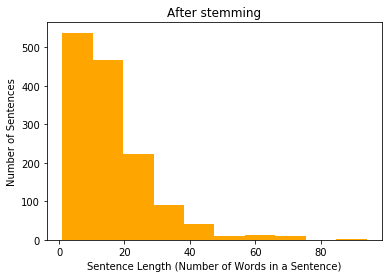

In [29]:
visualize_different_sentence_lengths(sinhala_dataframe, 'After stemming', 'Phrase')

<p>This is similar to the output that observed in the previous step. According to the above plot, it can be seen that <b>after removing 'stop words' and have done 'stemming'</b> the output have not differed due to the same reason that explained before.</p>

### Answer (c)

Answer for question (c) will be discussed under the below sections as 
<ol>
    <li>Splitting data into training and test data sets</li>
    <li>Creating bag-of-words representations, Fitting Logistic Regression model and Evaluation using Performance Measures and Confusion Matrix for Sinhala Dataset</li> 
    <li>Creating bag-of-words representations, Fitting Logistic Regression model and Evaluation using Performance Measures and Confusion Matrix for Singlish Dataset</li>
 </ol>

#### c.1. Splitting data into training and test data sets

<p>Before moving onto creating bag of words representations, let us split both the dataset (training 80% and testing 20%) as suggested in the question as shown below. After that bag of words representations for both the datasets can be created using training data sets and get bag of words features in order to be fed to the logistic regression model to train it. 
    <br><br>Let us define a function named <b>prepare_datasets(corpus, labels)</b> to split a particular dataset in 80:20 ratio for training and testing data accordingly.
</p>

In [33]:
from sklearn.model_selection import train_test_split

# Define a function to divide the data into training and testing sets in 80:20 ratio
def prepare_datasets(corpus, labels):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels, 
                                                        test_size=0.20, random_state=42)
    
    # Retrieve the length of the train set for dataset
    print ("Number of train data for the dataset :", end="")
    print (str(len(train_X)))

    # Retrieve the length of the test set for dataset
    print ("Number of test data for the dataset :", end="")
    print (str(len(test_X)))

    return train_X, test_X, train_Y, test_Y

<p>The <b>Sinhala dataset</b> can be spliited as below.</p>

In [34]:
train_X_sinhala, test_X_sinhala, train_y_sinhala, test_y_sinhala = prepare_datasets(corpus=sinhala_dataframe['Phrase'], 
                                                                                    labels=sinhala_dataframe['IsHateSpeech'])

Number of train data for the dataset :1114
Number of test data for the dataset :279


<p>The train set consist of 1114 Sinhala phrases and the test set consist of 279 which were spliited in 80:20 ratio.</p>

<p>The <b>Singlish dataset</b> can be spliited as below.</p>

In [35]:
train_X_singlish, test_X_singlish, train_y_singlish, test_y_singlish = prepare_datasets(
                                                                                    corpus=singlish_dataframe['Phrase'], 
                                                                                    labels=singlish_dataframe['IsHateSpeech'])

Number of train data for the dataset :885
Number of test data for the dataset :222


<p>The train set consist of 885 Sinhala phrases and the test set consist of 222 which were spliited in 80:20 ratio.</p>

#### c.2. Creating bag-of-words representation, Fitting Logistic Regression model and Evaluation using Performance Measures and Confusion Matrix for Sinhala Dataset

##### Getting bag-of-words representation for Sinhala Dataset

<p>The bag of words representation can be created using the <b>CountVectorizer</b> in scikit-learn. The following function named <b>get_bow_features(data)</b> has the ability to generate bag of words when a particular dataset has fed as an argument. The comments in the function describe each line of the code below.</p>

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to get bag of words features
def get_bow_features(data):
    
    # Convert the list of lists (tokenized sentences) to list of strings by joining the tokens inside
    # because fit_transform need a list of strings
    corpus = [" ".join(x) for x in data]
    
    # Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
    # In here the word tokenization should be done by splitting with " " and word n-gram was used as the analyzer
    vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), analyzer="word")                                

    # fit_transform is used to fit the model and to learn the vocabulary. 
    # Also, it transforms the dataframe into feature vectors
    # The input to fit_transform should be a list of strings. The output is a sparse array
    bow_features = vectorizer.fit_transform(corpus)

    # Get words in the vocabulary
    feature_names = vectorizer.get_feature_names()
    
    # Get the vocabulary
    vocabulary = vectorizer.vocabulary_
   
    return vectorizer, feature_names, vocabulary, bow_features

<p>When a particular dataset has been fed as the argument of the above function, it will return 4 things. 
    <ol>
        <li><b>vectorizer</b> which consists the vectorizer</li>  
        <li><b>feature_names</b> which consists the words in the vocabulary</li>  
        <li><b>vocabulary</b> which consists the words and the number of times that they have occured in the vocabulary</li> 
        <li><b>bow_features</b> which consists a sparse array which depicts a term document matrix</li> 
    </ol>
 </p>    

<p>Let us generate the <b>bag of words representation for training data in Sinhala dataset</b>.</p>

In [37]:
vectorizer_sinhala, feature_names_sinhala, vocabulary_sinhala, bow_features_sinhala = get_bow_features(data=train_X_sinhala)

In [43]:
#vocabulary_sinhala

<p>Above are the words and the number of times that they have occured in the <b>vocabulary of Sinhala dataset</b>.</p>

In [42]:
bow_features_sinhala.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

<p>Above is the <b>term document matrix vocabulary of Sinhala dataset</b> which is the bag of word features to be fed to the model in future steps.</p>

##### Fitting logistic regression model to Sinhala Dataset


The Logistic Regression Model can be trained using the following function named <b>train_logistic_regression_model(features, labels)</b> using LogisticRegression from sklearn as explained in the comments of the function.

In [44]:
from sklearn.linear_model import LogisticRegression

# Define a function which takes the features and set of labels to train a Logistic Regression Model
def train_logistic_regression_model(features, labels):
    
    print ("Training the logistic regression model...")
    
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(features, labels)
    
    print ('Finished')
    return logistic_regression_model

<p>Let us apply <b>Logistic Regression to the Sinhala dataset</b> as shown below by passing the bag-of-words features created previously and the train labels for Sinhala dataset.</p>

In [45]:
logistic_regression_model_sinhala = train_logistic_regression_model(features=bow_features_sinhala, labels=train_y_sinhala)

Training the logistic regression model...
Finished


<p>Now let us use the bag-of-words representation to test data. Below function named <b>predict_logistic_regression_model(test_X, test_y, vectorizer, logistic_regression_model)</b> have the ability to apply the vectorizer to the test data and get the predictions for test data. Before applying the vectorizer to test data, those should be converted to a list of strings (since now we have a list of list) as shown in the function, because vectorizer expects an array/list of strings. Otherwise if you pass an array/list of array/list to the vectorizer, it crashes. After that predictions can be observed and a simple accuracy was calculated.<p>

In [46]:
import numpy as np

# Define a function to apply the vectorizer to the test data and get the predictions for test data
def predict_logistic_regression_model(test_X, test_y, vectorizer, logistic_regression_model):
    
    # If you externally vectorize the test you do not need to vectorize in here. So you can pass vectorizer as 'None'
    if(vectorizer!=None):
        
        # Convert the list of list, to a list of strings so that the vectorizer can work without crashing
        test_X = [' '.join(x) for x in test_X]

        # Apply the vectorizer to the test data 
        test_data_features = vectorizer.transform(test_X)

        # Convert to numpy array
        test_data_features = test_data_features.toarray()
    else:
        test_data_features = test_X
    
    # Get the predictions for the test data in the dataset
    predicted_y = logistic_regression_model.predict(test_data_features)
    print("Predictions: ")
    print(predicted_y)
    print("\n")

    # Calculating the simple accuracy
    correctly_identified_y = predicted_y == test_y
    accuracy = np.mean(correctly_identified_y) * 100
    print ('Accuracy = %.0f%%' %accuracy)
    
    # Return the predicted labels
    return predicted_y

<p>Let us apply the above function to evaluate the model with test data as below.</p>

In [47]:
predicted_y_sinhala = predict_logistic_regression_model(test_X=test_X_sinhala, 
                                                        test_y=test_y_sinhala, 
                                                        vectorizer=vectorizer_sinhala, 
                                                        logistic_regression_model=logistic_regression_model_sinhala)

Predictions: 
['NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO

<p>The predictions array has shown above which consists whether a particular string is hate speech (YES) or not (NO) and it was returned and assigned to predicted_y_sinhala variable. The accuracy of this model is 75%.</p>

##### Evaluation using Performance Measures and Confusion Matrix for Sinhala Dataset

<p>Below function named <b>get_metrics(true_labels, predicted_labels)</b> outputs the confusion matrix and calculates the Accuracy, Precision, Recall and F1 Score when the true labels and the predicted labels are fed as the arguments.</p>

In [48]:
# Use sklearn's metrics function for evaluation of classifiers
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix 

# Define function to calculate the 4 common metrics
def get_metrics(true_labels, predicted_labels):
    
    # Plot the confusion matrix
    labels = ['YES', 'NO']
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted class')
    plt.show()
    
    print ('Number of True Positives (TP): ',conf_matrix[0][0])
    print ('Number of True Negatives (TN): ',conf_matrix[1][1])
    print ('Number of False Positives (FP): ',conf_matrix[1][0])
    print ('Number of False Negatives (FN): ',conf_matrix[0][1])
    print('')
    
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 3)*100, '%')
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 3)*100, '%')
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 3)*100, '%')
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 3)*100, '%')

<p>Let us get the confusion matrix and the performance measures for Sinhala dataset.</p>

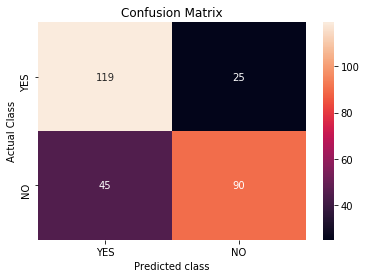

Number of True Positives (TP):  119
Number of True Negatives (TN):  90
Number of False Positives (FP):  45
Number of False Negatives (FN):  25

Accuracy: 74.9 %
Precision: 75.3 %
Recall: 74.9 %
F1 Score: 74.7 %


In [49]:
get_metrics(true_labels=test_y_sinhala, predicted_labels=predicted_y_sinhala)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 74.9% here. </li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 75.3% here. It says that 75.3% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 74.9% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 74.9% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 74.7% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 70 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y)</b>. </p>

In [50]:
#  Define a function to get errors
def get_errors(test_X, test_y, predicted_y):
    errors = []
    
    # Join the tokens and create a sentence
    test_X = [' '.join(x) for x in test_X]
    
    # Iterate through the test set
    for index in range (0, len(test_X)):   
        
        # Check whether the particular actual label matches with the predicted label.
        if test_y.tolist()[index] != predicted_y.tolist()[index]:
            # If does not match it is an error
            errors.append( (test_X[index], test_y.tolist()[index], predicted_y.tolist()[index]))
    
    # Print the errors
    count = 1
    for row in errors:
        print(count)
        print("Sentence: ",end="")
        print (row[0])
        print("Actual Label: ",end="")
        print (row[1])
        print("Predicted Label: ",end="")
        print (row[2])
        print ("\n")
        count = count + 1

<p>Let us get the errors for incorrectly predicted sentences in the Sinhala dataset.</p>

In [51]:
get_errors(test_X=test_X_sinhala, test_y=test_y_sinhala, predicted_y=predicted_y_sinhala)

1
Sentence: අප රට ලොක හෙන ව දෙලොව නැ අපතයොන් පිලිග ගොබ්බ පරපුර බිහිවීම
Actual Label: YES
Predicted Label: NO


2
Sentence: ම හඬ කව එක අම්ම තනිකර ම වද තියෙ කැලෑ කකුල අස්ස ගණි මඩ තනිකර අම්ම කාල තො තාත්ත අහ එ පණ
Actual Label: YES
Predicted Label: NO


3
Sentence: ලංකා පාලන අවශ නැ මිනිස්ස තම පාඩ හැමදේ කරද්දි කාලකන් අපේ සල්ලි වල අපි අරි දකි තැ ගහ එලව සමාජ බිහිෙවනක මෙව් මෙහෙ
Actual Label: NO
Predicted Label: YES


4
Sentence: තිය අ දෙන වැඩි අසර අ ඉන්න එ අයටන දෙ ඔි
Actual Label: YES
Predicted Label: NO


5
Sentence: තම්බිය සි0හල ගහද්දි නික හිටි
Actual Label: YES
Predicted Label: NO


6
Sentence: මොනතර ගින්දර ප ඇතුල පත්ත වෙ අැද් තාත්ත අ ප උස්මහ කර තාත්ත දෙයියන ශාප වෙ උඹල ආත්මෙ
Actual Label: YES
Predicted Label: NO


7
Sentence: සරාග ගැහැන නිද සියල පිරි කැමත දීග ය ගෞරව රැකග ගැහැන පමනය
Actual Label: YES
Predicted Label: NO


8
Sentence: ඇද ඇදග ය අපි ලැජ ම ව නිල ඒ
Actual Label: YES
Predicted Label: NO


9
Sentence: මොහු ම අප අදහස දැක්වූ ම පුත මැරුණ බෝධ රැු ගත බෙදාහද ගනි මුස්ලි ත ් රස්තවාද විරුද්

<p>Below function <b>find_important_words(feature_names, model)</b> finds the important and least important tokens in the vocabulary based on the logisitic regression model that created.<p>

In [52]:
# Define a function to check which tokens have high coefficients and low coefficients
# High coefficient -> Important
# Low coefficient -> NOT Important
def find_important_words(feature_names, log_reg_model):
    
    # Create a dataframe with the feature names and corresponding coefficients of those from the model
    log_reg_coeff = pd.DataFrame({'feature_names': feature_names,
                              'model_coefficient': log_reg_model.coef_.transpose().flatten()})
    
    # Sort the value in descending order
    log_reg_coeff = log_reg_coeff.sort_values('model_coefficient', ascending=False)
    
    # Top 10 values are the important tokens
    log_reg_coeff_top = log_reg_coeff.head(10)
    
    # Bottom 10 values are the least important tokens
    log_reg_coeff_bottom = log_reg_coeff.tail(10)
    
    return log_reg_coeff_top, log_reg_coeff_bottom

<p>Let us find the important and least important words from the model.</p>

In [53]:
log_reg_coeff_top_sinhala, log_reg_coeff_bottom_sinhala = find_important_words(feature_names=feature_names_sinhala,
                                                                               log_reg_model=logistic_regression_model_sinhala)

In [54]:
log_reg_coeff_top_sinhala

,feature_names,model_coefficient
2383,පක්,2.134568
1072,කාලකන්,1.935109
1685,තම්බි,1.775956
4171,වේස,1.661376
4800,හුත්ත,1.325732
3289,මුස්ලි,1.290476
3115,මර,1.274039
2380,පක,1.227753
4491,සුද්ද,1.146730
3895,වල,1.118502


<p>As you can see above tokens have high coefficient values. Thus those are important tokens that has a high influence in hate speech.</p>

In [55]:
log_reg_coeff_bottom_sinhala

,feature_names,model_coefficient
3835,වග,-0.756965
411,ඇත්ත,-0.766404
4127,වෙන,-0.786429
308,අහ,-0.809870
1973,දුන්,-0.919702
2688,පුත,-0.921174
3105,මනුස්ස,-0.928337
2215,නිත,-0.940486
1540,ජ,-0.989489
2397,පට්,-1.023333


<p>As you can see above tokens have low coefficient values. Thus those are least important tokens that has a low influence in hate speech.</p>

#### c.3. Creating bag-of-words representation, Fitting Logistic Regression model and Evaluation using Performance Measures and Confusion Matrix for Singlish Dataset

<p>All the steps that have been performed in the 2nd step should be repeated for the Singlish Dataset as below.</b>

##### Getting bag-of-words representation for Singlish Dataset

<p>Let us generate the <b>bag of words representation for training data in Singlish dataset</b>.</p>

In [56]:
vectorizer_singlish, feature_names_singlish, vocabulary_singlish, bow_features_singlish = get_bow_features(
                                                                                                    data=train_X_singlish)

In [57]:
# vocabulary_singlish

<p>Above are the words and the number of times that they have occured in the <b>vocabulary of Singlish dataset</b>.</p>

In [58]:
bow_features_singlish.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<p>Above is the <b>term document matrix vocabulary of Singlish dataset</b> which is the bag of word features to be fed to the model in future steps.</p>

##### Fitting logistic regression model to Singlish Dataset

<p>Let us apply <b>Logistic Regression to the Singlish dataset</b> as shown below by passing the bag-of-words features created previously and the train labels for Sinhala dataset.</p>

In [59]:
logistic_regression_model_singlish = train_logistic_regression_model(features=bow_features_singlish, labels=train_y_singlish)

Training the logistic regression model...
Finished


<p>Let us get the predictions for test data as below.</p>

In [60]:
predicted_y_singlish = predict_logistic_regression_model(test_X=test_X_singlish, 
                                                         test_y=test_y_singlish, 
                                                         vectorizer=vectorizer_singlish, 
                                                         logistic_regression_model=logistic_regression_model_singlish)

Predictions: 
['NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'N

<p>The predictions array has shown above which consists whether a particular string is hate speech (YES) or not (NO) and it was returned and assigned to predicted_y_singlish variable. The accuracy of this model is 69% <b>which is less than the model that was created before which consisted only Sinhala data</b>.</p>

##### Evaluation using Performance Measures and Confusion Matrix for Singlish Dataset

<p>Let us get the confusion matrix and the performance measures for Singlish dataset.</p>

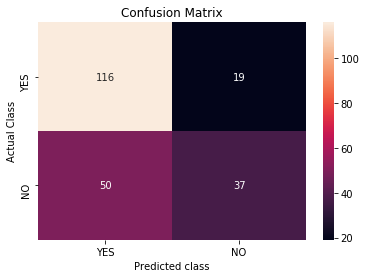

Number of True Positives (TP):  116
Number of True Negatives (TN):  37
Number of False Positives (FP):  50
Number of False Negatives (FN):  19

Accuracy: 68.89999999999999 %
Precision: 68.4 %
Recall: 68.89999999999999 %
F1 Score: 67.2 %


In [61]:
get_metrics(true_labels=test_y_singlish, predicted_labels=predicted_y_singlish)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 68.89% here. </li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 68.4% here. It says that 68.4% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 68.89% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 68.89% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 67.2% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 69 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y)</b>. </p>

In [62]:
get_errors(test_X=test_X_singlish, test_y=test_y_singlish, predicted_y=predicted_y_singlish)

1
Sentence: auda eka hadapu mi haraka hinawela badath rideawa
Actual Label: YES
Predicted Label: NO


2
Sentence: Oyage thawakalika sathuta uparima winda ganna okata windawanna weddi daraganna bari wei
Actual Label: YES
Predicted Label: NO


3
Sentence: Fatta sinduwe theruma nm kiyala wadak na me wage kathawak dala sinduwa haduwat godak thx meka nm matama gahala wage
Actual Label: NO
Predicted Label: YES


4
Sentence: Nadukarayage mulu engema gedidapn okage paaulama hedigeviyan
Actual Label: YES
Predicted Label: NO


5
Sentence: එහෙමද ආස කැරී wecii
Actual Label: YES
Predicted Label: NO


6
Sentence: Deshapalanaya wenai sabawaka kuhaka kam kirieema anumatha karanna ba kalawa kiyanne sundarathwaya misak kuhaka kama neme
Actual Label: YES
Predicted Label: NO


7
Sentence: මොකද ඉතින් ඒවට විතරයි මෙයාගෙන් Video Clip එළියට එන්නෙ පන්සල් බුදු පිළිම තම්බියො කඩන්නෙ නැහැලු
Actual Label: YES
Predicted Label: NO


8
Sentence: Buki karayonta owa dunnma u ekath wikunagena kanawa mokada munta ona kohom

<p>Let us find the important and least important words from the model.</p>

In [63]:
log_reg_coeff_top_singlish, log_reg_coeff_bottom_singlish = find_important_words(
                                                                feature_names=feature_names_singlish,
                                                                log_reg_model=logistic_regression_model_singlish)

In [64]:
log_reg_coeff_top_singlish

,feature_names,model_coefficient
6180,පක්කු,1.638356
2785,munta,1.461008
2778,mun,1.174627
3355,ponna,1.055726
1521,gon,0.983434
603,balu,0.974114
543,badu,0.918473
2056,karanna,0.875578
4389,wesa,0.842725
4129,unp,0.779373


<p>As you can see above tokens have high coefficient values. Thus those are important tokens that has a high influence in hate speech.</p>

In [65]:
log_reg_coeff_bottom_singlish

,feature_names,model_coefficient
3525,respect,-0.613554
3875,thamai,-0.616190
4189,video,-0.650641
3019,obata,-0.717812
3634,saranai,-0.732874
4122,unath,-0.790494
2799,nadda,-0.801510
209,aiya,-0.829827
1513,godak,-0.832701
1741,hoda,-0.912628


<p>As you can see above tokens have low coefficient values. Thus those are least important tokens that has a low influence in hate speech.</p>

### Answer (d)

Answer for question (d) will be discussed under the below sections as 
<ol>
    <li>Merge the Sinhala and Singlish Datasets to get the Full Preprocessed Dataset</li>
    <li>Splitting data into training and test data sets</li> 
    <li>Getting bag-of-words representation for Full Dataset</li>
    <li>Fitting logistic regression model to Full Dataset</li>
    <li>Evaluation using Performance Measures and Confusion Matrix for Full Dataset</li>
    <li>Comparing the results with (c) and deciding whether to process these two data sets together or separately in future steps</li>
 </ol>

#### d.1. Merge the Sinhala and Singlish Datasets to get the Full Preprocessed Dataset

In [66]:
full_dataframe = pd.concat([sinhala_dataframe, singlish_dataframe])
full_dataframe

,PhraseNo,Phrase,IsHateSpeech
0,1,"[බැල්ලි, කොටි, ග, කනකො, අපහසු, දැනුන, ද, ඔ, මි...",YES
1,2,"[ම, ඊ, මුස්ලි, ඩෑල, එ, සෙල්ෆි, ගත්ත, සහජීවන, ර...",YES
2,3,"[සංහිදියා, අවුල, වෙ]",NO
3,4,"[කට, පුරසාර, දොඩ, අපි, සිංහලය, විදි, ලැජ්ජ, ව,...",YES
4,5,"[මච, මගු, නවත්ත, කොන්ද, තියෙනවාන, පුලුවන්න, කර...",YES
...,...,...,...
2492,2493,"[1002, ඔන්න, ඔයාව, subscribe, කරා, මාවත්, subs...",NO
2494,2495,"[අපේ, අලුත්, වීඩියෝ, එකත්, බලන්න, පෙන්ඩ්ස්, චැ...",NO
2495,2496,"[ඔය, දෙන්නා, එකතු, වෙලා, tv, program, එකක්, කර...",NO
2497,2498,"[ඇස්වහ, කටවහක්, නෑ, ඔයාලා, දෙනාටම, හැමදාමත්, අ...",NO


#### d.2. Splitting data into training and test data sets

<p>The <b>full dataset</b> can be spliited as below.</p>

In [67]:
train_X_full, test_X_full, train_y_full, test_y_full = prepare_datasets(corpus=full_dataframe['Phrase'], 
                                                                        labels=full_dataframe['IsHateSpeech'])

Number of train data for the dataset :2000
Number of test data for the dataset :500


<p>The train set consist of 2000 phrases and the test set consist of 500 which were spliited in 80:20 ratio.</p>

#### d.3. Getting bag-of-words representation for Full Dataset

<p>Let us generate the <b>bag of words representation for training data in Full dataset</b>.</p>

In [68]:
vectorizer_full, feature_names_full, vocabulary_full, bow_features_full = get_bow_features(data=train_X_full)

In [69]:
# vocabulary_full

In [70]:
bow_features_full.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<p>Above is the <b>term document matrix vocabulary of full dataset</b> which is the bag of word features to be fed to the model in future steps.</p>

#### d.4. Fitting logistic regression model to Full Dataset

<p>Let us apply <b>Logistic Regression to the Full dataset</b> as shown below by passing the bag-of-words features created previously and the train labels for Full dataset.</p>

In [71]:
logistic_regression_model_full = train_logistic_regression_model(features=bow_features_full, labels=train_y_full)

Training the logistic regression model...
Finished


<p>Let us apply get the predictions for test data as below.</p>

In [ ]:
predicted_y_full = predict_logistic_regression_model(test_X=test_X_full, 
                                                     test_y=test_y_full, 
                                                     vectorizer=vectorizer_full, 
                                                     logistic_regression_model=logistic_regression_model_full)

Predictions: 
['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 

<p>The predictions array has shown above which consists whether a particular string is hate speech (YES) or not (NO) and it was returned and assigned to predicted_y_full variable. The accuracy of this model is 74% <b>which is greater than the model that was created before which consisted only Singlish data but less than the model that was created before which consisted only Sinhala data</b>.</p>

#### d.5. Evaluation using Performance Measures and Confusion Matrix for Full Dataset

<p>Let us get the confusion matrix and the performance measures for full dataset.</p>

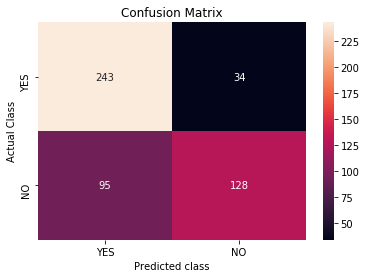

Number of True Positives (TP):  243
Number of True Negatives (TN):  128
Number of False Positives (FP):  95
Number of False Negatives (FN):  34

Accuracy: 74.2 %
Precision: 75.1 %
Recall: 74.2 %
F1 Score: 73.4 %


In [73]:
get_metrics(true_labels=test_y_full, predicted_labels=predicted_y_full)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 74.2% here. </li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 75.1% here. It says that 75.1% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 74.2% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 74.2% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 73.4% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 129 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y)</b>. </p>

In [74]:
get_errors(test_X=test_X_full, test_y=test_y_full, predicted_y=predicted_y_full)

1
Sentence: Meke inna moda ponna pakkuta tawama terenna aththa u kiyapu kathawa lether ballayak bat ekak allapu kisima ekek uta banne na
Actual Label: NO
Predicted Label: YES


2
Sentence: Ape rilawu tika okatath wade deyi
Actual Label: YES
Predicted Label: NO


3
Sentence: Badagini wela harak relata wal miti 225 kapala gihin dahalla atakota oya enaganna eka nawttaganiivi
Actual Label: YES
Predicted Label: NO


4
Sentence: අපි ඉල්ල වෙනස මල සින්දුකාරයි ඔබ අවධාන පිණිස
Actual Label: YES
Predicted Label: NO


5
Sentence: මෙ හිත ඉ මේ කර ලන්කා කි කාර්දේෂ වෙ වෙන්නැ අරු එක හරිය කුණුහරුප රැප න
Actual Label: YES
Predicted Label: NO


6
Sentence: Lankawe wage political majarayo innakam police quality eka wadi karanna baha
Actual Label: YES
Predicted Label: NO


7
Sentence: 4 simawata giya eka hatharak reka genimata noheki unaa
Actual Label: YES
Predicted Label: NO


8
Sentence: Mewa දාගෙන baik peddehekida ban හඳට යන්න වගේ nala පිරිසිදුව hitapallako oya මොකවත් kahanne ne
Actual Label: YES
Predicte

<p>Let us find the important and least important words from the model.</p>

In [75]:
log_reg_coeff_top_full, log_reg_coeff_bottom_full = find_important_words(feature_names=feature_names_full,
                                                                         log_reg_model=logistic_regression_model_full)

In [76]:
log_reg_coeff_top_full

,feature_names,model_coefficient
8085,පක්,1.987099
7027,තම්බි,1.871328
10690,වේස,1.692751
9389,මුස්ලි,1.647455
6079,කාලකන්,1.582271
11564,හුත්ත,1.399370
8086,පක්කු,1.362187
8495,පු,1.340992
9134,මර,1.284097
3319,ponna,1.266556


<p>As you can see above tokens have high coefficient values. Thus those are important tokens that has a high influence in hate speech.</p>

In [77]:
log_reg_coeff_bottom_full

,feature_names,model_coefficient
1480,godak,-0.836855
8102,පට්,-0.847782
10888,සර,-0.861128
7499,දුන්න,-0.866911
2776,nadda,-0.867140
2920,nisa,-0.882748
6800,ජ,-0.888539
7869,නිත,-0.939338
4847,අහ,-0.966940
1710,hoda,-1.127565


<p>As you can see above tokens have low coefficient values. Thus those are least important tokens that has a low influence in hate speech.</p>

#### d.6. Comparing the results with (c) and deciding whether to process these two data sets together or separately in future steps.

<p>In Answer (c) the two datasets were processed seperately as Sinhala (Model A) and Singlish (Model B) and in Answer (d) the datasets were merged and processed together (Model C). Following is a summary of performance measures of the above 3 models.<p>

<table align="left">
  <tr>
    <th></th>
    <th>Model A</th>
    <th>Model B</th>
    <th>Model C</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>74.9 %</td>
    <td>68.89 %</td>
    <td>74.2 %</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>75.3 %</td>
    <td>68.4 %</td>
    <td>75.1 %</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>74.9 %</td>
    <td>68.89 %</td>
    <td>74.2 %</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>74.7 %</td>
    <td>67.2 %</td>
    <td>73.4 %</td>
  </tr>
</table>

<p>When looking at all the performance measures of all the models, Model A is the best. But Model C has performed almost similar to Model A. Thus, <b>improving the Model C would be more advantageous</b> because it will consider both datasets together, and increasing the preformance of this model will be a benifit to both Sinhala and Singlish datasets.</p>

### Answer (e)

Answer for question (e) will be discussed under the below sections as 
<ol>
    <li>Getting TF-IDF features for Full Dataset (Sinhala and Singlish)</li>
    <li>Apply Logistic Regression with Cross Validation for Full Dataset (Sinhala and Singlish) with TF-IDF features</li> 
    <li>Apply Logistic Regression without Cross Validation for Full Dataset (Sinhala and Singlish) with TF-IDF features</li>
 </ol>
 
 <p>From this section the <b>Full Dataset</b> will be considered.</p>

#### e.1. Getting TF-IDF features for Full Dataset (Sinhala and Singlish)

<p>The tfidf representation can be created using the <b>TfidfVectorizer</b> in scikit-learn. The following function named  <b>get_tfidf_features(data, ngram_range=(1,1))</b> has the ability to generate tfidf features when a particular dataset has fed as an argument (optionally the n-gram range can be fed which will be discussed in question (f)). The comments in the function describe each line of the code below.</p>

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to get tfidf features when dataset is passed
# Here, the ngram_range is set to (1,1) by default because TfidfVectorizer will also have this value as default
# unless we change it. This value will be changed in question (f)
def get_tfidf_features(data, ngram_range=(1,1), stop_words='english'):
    
    # Convert the list of lists (tokenized sentences) to list of strings by joining the tokens inside
    # since fit_transform need a list of strings
    corpus = [" ".join(x) for x in data]
    
    # Initialize the "TfidfVectorizer" object
    # In here the word tokenization should be done by splitting with " " and word n-gram was used as the analyzer
    # The maximum number of features were given as 5667, since in the corpus there were 5667 unique words
    # Also, the Sinhala stop words list has been fed in order to remove stop words in Singlish dataset 
    vectorizer = TfidfVectorizer(tokenizer = lambda x: x.split(" "), 
                                 analyzer="word", 
                                 max_features = 5667,
                                 ngram_range=ngram_range, 
                                 stop_words=stop_words,
                                 min_df=1)                                

    # fit_transform is used to fit the model and to learn the vocabulary. 
    # Also, it transforms the dataframe into feature vectors
    # The input to fit_transform should be a list of 
    # strings. The output is a sparse array
    tfidf_features = vectorizer.fit_transform(corpus)

    # Get words in the vocabulary
    feature_names = vectorizer.get_feature_names()
    
    # Get the vocabulary
    vocabulary = vectorizer.vocabulary_
   
    return vectorizer, feature_names, vocabulary, tfidf_features

<p>When a particular dataset has been fed as the argument of the above function, it will return 4 things. 
    <ol>
        <li><b>vectorizer</b> which consists the vectorizer</li>  
        <li><b>feature_names</b> which consists the words in the vocabulary</li>  
        <li><b>vocabulary</b> which consists the words and the number of times that they have occured in the vocabulary</li> 
        <li><b>tfidf_features</b> which consists a sparse array which depicts a tf-idf matrix</li> 
    </ol>
 </p>    

#### e.2. Apply Logistic Regression with Cross Validation for Full Dataset (Sinhala and Singlish) with TF-IDF features

<p>Let us generate the <b>tf-idf features for all the data in full dataset</b>.</p>

In [81]:
tfidf_vectorizer_full, tf_idf_feature_names_full, tf_idf_vocabulary_full, tfidf_features_full = get_tfidf_features(
                                                                                            data=full_dataframe['Phrase'])

<p>Here, the tfidf features was generated without considering the train or test splits because the cross validation should be applied to the whole dataset. It will automatically decide the train and test splits according to the cross validation splitting strategy (cv).</p> 

In [84]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from prettytable import PrettyTable

# Define a function which takes the features and set of labels to train a Logistic Regression Model with 
# number of cross validations specified by k
def train_logistic_regression_model_with_cross_validation(features, labels, k=10):
    
    print ("Training the logistic regression model...")
    
    logistic_regression_model = LogisticRegression()
    
    # To obtain the performance measures
    scoring = {'accuracy':'accuracy', 
               'precision':make_scorer(precision_score,pos_label="YES"), 
               'recall':make_scorer(recall_score,pos_label="YES"), 
               'f1':make_scorer(f1_score,pos_label="YES")}
    
    # Apply cross validation
    scores = cross_validate(logistic_regression_model, features, labels, cv=k, scoring=scoring, return_train_score=True)
    
    print ('Finished')
    print("\n")
   
    print ("Train Performance")
    train_performance = PrettyTable(['Iteration', 'Train Accuracy (%)','Train Precision (%)',
                                     'Train Recall (%)','Train F1 Score (%)'])
    for index in range(0, 10):
        train_performance.add_row([index+1,
                   str(round(scores["train_accuracy"][index]*100, 2)), 
                   str(round(scores["train_precision"][index]*100, 2)), 
                   str(round(scores["train_recall"][index]*100, 2)), 
                   str(round(scores["train_f1"][index]*100, 2))])
    print(train_performance)
    print("Average Train Accuracy: ", str(round(scores["train_accuracy"].mean()*100, 2)) +" %")
    print("Average Train Precision: ", str(round(scores["train_precision"].mean()*100, 2)) +" %")
    print("Average Train Recall: ", str(round(scores["train_recall"].mean()*100, 2)) +" %")
    print("Average Train F1 Score: ", str(round(scores["train_f1"].mean()*100, 2)) +" %")
    print('\n')
    
    print ("Test Performance")
    test_performance = PrettyTable(['Iteration', 'Test Accuracy (%)','Test Precision (%)',
                                    'Test Recall (%)','Test F1 Score (%)'])
    for index in range(0, 10):
        test_performance.add_row([index+1,
                   str(round(scores["test_accuracy"][index]*100, 2)), 
                   str(round(scores["test_precision"][index]*100, 2)), 
                   str(round(scores["test_recall"][index]*100, 2)), 
                   str(round(scores["test_f1"][index]*100, 2))])
    print(test_performance)
    print("Average Test Accuracy: ", str(round(scores["test_accuracy"].mean()*100, 2)) +" %")
    print("Average Test Precision: ", str(round(scores["test_precision"].mean()*100, 2)) +" %")
    print("Average Test Recall: ", str(round(scores["test_recall"].mean()*100, 2)) +" %")
    print("Average Test F1 Score: ", str(round(scores["test_f1"].mean()*100, 2)) +" %")
    
    return scores

In [85]:
scores = train_logistic_regression_model_with_cross_validation(tfidf_features_full, full_dataframe['IsHateSpeech'])

Training the logistic regression model...
Finished


Train Performance
+-----------+--------------------+---------------------+------------------+--------------------+
| Iteration | Train Accuracy (%) | Train Precision (%) | Train Recall (%) | Train F1 Score (%) |
+-----------+--------------------+---------------------+------------------+--------------------+
|     1     |        90.8        |        96.78        |      81.85       |       88.69        |
|     2     |       91.56        |         97.4        |      83.06       |       89.66        |
|     3     |       90.58        |        96.76        |      81.35       |       88.39        |
|     4     |       90.58        |        96.88        |      81.27       |       88.39        |
|     5     |       89.91        |        96.37        |      80.16       |       87.52        |
|     6     |       91.24        |        97.04        |      82.68       |       89.29        |
|     7     |       90.22        |        95.96        |

<p>As shown above for each iteration values of all the performance measures are higher when training than in testing. This means that the model has <b>overfitted</b>, and only has the ability to give better performance for seen data (training) rather than unseen data (testing). This can be because the dataset is small. So cross validation does not suit here. In future steps, cross validation will not be used.</p>

<p>In the next section, let us see the performance of the model without cross validation.</p>

#### e.3. Apply Logistic Regression without Cross Validation for Full Dataset (Sinhala and Singlish) with TF-IDF features

<p>Let us generate the <b>tf-idf features for train data in full dataset</b>.</p>

In [86]:
tfidf_vectorizer_full, tf_idf_feature_names_full, tf_idf_vocabulary_full, tfidf_features_full = get_tfidf_features( 
                                                                                                            data=train_X_full)

In [87]:
tfidf_features_full.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<p>Above is the <b>tf-idf matrix for full dataset</b> which will be fed to the model in future steps.</p>

<p>Let us apply <b>Logistic Regression to the Full dataset</b> as shown below by passing the tf-idf features created previously and the train labels for Full dataset.</p>

In [88]:
logistic_regression_model_full_tfidf = train_logistic_regression_model(features=tfidf_features_full, 
                                                                       labels=train_y_full)

Training the logistic regression model...
Finished


<p>Let us apply get the predictions for test data as below.</p>

In [89]:
predicted_y_full_tfidf = predict_logistic_regression_model(test_X=test_X_full, 
                                                           test_y=test_y_full, 
                                                           vectorizer=tfidf_vectorizer_full, 
                                                           logistic_regression_model=logistic_regression_model_full_tfidf)

Predictions: 
['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' '

<p>The predictions array has shown above which consists whether a particular string is hate speech (YES) or not (NO) and it was returned and assigned to predicted_y_full_tfidf variable. The accuracy of this model is 73% <b>which is less than the model that was created before by just using the bag-of-features but this is far better than the model that used cross validation</b>.</p>

<p>Let us get the confusion matrix and the performance measures for Full dataset.</p>

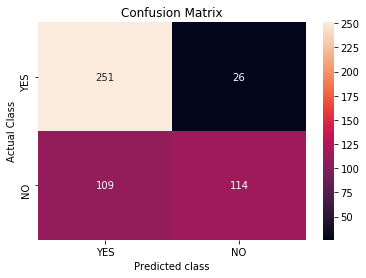

Number of True Positives (TP):  251
Number of True Negatives (TN):  114
Number of False Positives (FP):  109
Number of False Negatives (FN):  26

Accuracy: 73.0 %
Precision: 74.9 %
Recall: 73.0 %
F1 Score: 71.7 %


In [90]:
get_metrics(true_labels=test_y_full, predicted_labels=predicted_y_full_tfidf)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 73.0% here. </li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 74.9% here. It says that 74.9% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 73.0% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 73.0% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 71.7% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 135 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y). Even when considering all the performance measures this is better than the model that was created using cross validation</b>. </p>

In [91]:
get_errors(test_X=test_X_full, test_y=test_y_full, predicted_y=predicted_y_full_tfidf)

e: අපි ඉල්ල වෙනස මල සින්දුකාරයි ඔබ අවධාන පිණිස
Actual Label: YES
Predicted Label: NO


5
Sentence: දහ කතිකාවත අැතිව්නෙ කල පස්සෙ සිංහ අපි දහමෙ ඈ කරා මෙි හොර නඩෙි වාසියිනෙ එ්ක මෙි බ ක හර මොර දේන්නෙ
Actual Label: YES
Predicted Label: NO


6
Sentence: මෙ හිත ඉ මේ කර ලන්කා කි කාර්දේෂ වෙ වෙන්නැ අරු එක හරිය කුණුහරුප රැප න
Actual Label: YES
Predicted Label: NO


7
Sentence: Lankawe wage political majarayo innakam police quality eka wadi karanna baha
Actual Label: YES
Predicted Label: NO


8
Sentence: 4 simawata giya eka hatharak reka genimata noheki unaa
Actual Label: YES
Predicted Label: NO


9
Sentence: Mewa gobba weda ban desapalanayata kade yama saha athata atha dimai kiyanne dekak anika desapalakayata wirodaya panne thawa ekekta kade yanagaman newe
Actual Label: YES
Predicted Label: NO


10
Sentence: Mewa දාගෙන baik peddehekida ban හඳට යන්න වගේ nala පිරිසිදුව hitapallako oya මොකවත් kahanne ne
Actual Label: YES
Predicted Label: NO


11
Sentence: රටෙ දේ විකුනං ක උ කඩෙ ය ර හැග නැ උ තව ඉන

<p>Let us find the important and least important words from the model.</p>

In [92]:
log_reg_coeff_top_full_tfidf, log_reg_coeff_bottom_full_tfidf = find_important_words(
                                                                        feature_names=tf_idf_feature_names_full,
                                                                        log_reg_model=logistic_regression_model_full_tfidf)

In [93]:
log_reg_coeff_top_full_tfidf

,feature_names,model_coefficient
2563,ගහ,2.124252
2714,තම්බි,1.985567
5247,වේස,1.966561
3392,පක්,1.960543
2414,කාලකන්,1.854915
4441,මර,1.668156
4858,යක,1.633006
3393,පක්කු,1.534377
5614,හුත්ත,1.518912
5098,වල,1.507107


<p>As you can see above tokens have high coefficient values. Thus those are important tokens that has a high influence in hate speech.</p>

In [94]:
log_reg_coeff_bottom_full_tfidf

,feature_names,model_coefficient
5590,හිත,-0.959089
5310,සර,-0.963729
1831,අප,-0.964289
4419,මනුස්ස,-0.965786
907,godak,-0.975058
4432,මම,-1.023002
1919,අහ,-1.027025
5030,ලස්සන,-1.042435
1056,hoda,-1.334763
2250,ඔබ,-1.481166


<p>As you can see above tokens have low coefficient values. Thus those are least important tokens that has a low influence in hate speech.</p>

### Answer (f)

Answer for question (f) will be discussed under the below sections as 
<ol>
    <li>Considering context words by building a bag-of-n-grams model</li>
    <li>Using semantic embeddings instead of bag-of-word vectors for word representation to model the data</li>
 </ol>

#### f.1. Considering context words by building a bag-of-n-grams model

<p>Here we will be passing an argument as (1,2) to the previously defined function <b>get_tfidf_features(data, ngram_range=(1,1))</b> so that it will consider  unigram and bigrams when building tf-idf model. </p>

<p>Let us generate the <b>tf-idf features for training data in full dataset as an n-gram model</b>.</p>

In [95]:
tfidf_vectorizer_full, tf_idf_feature_names_full, tf_idf_vocabulary_full, tfidf_features_full = get_tfidf_features(
                                                                                                        data=train_X_full, 
                                                                                                        ngram_range=(1,2))

<p>Let us apply <b>Logistic Regression to the Full dataset</b> as shown below by passing the tf-idf features with n-grams created previously and the train labels for Full dataset.</p>

In [96]:
logistic_regression_model_full_tfidf = train_logistic_regression_model(features=tfidf_features_full, labels=train_y_full)

Training the logistic regression model...
Finished


<p>Let us apply get the predictions for test data as below.</p>

In [97]:
predicted_y_full_tfidf = predict_logistic_regression_model(test_X=test_X_full, 
                                                           test_y=test_y_full, 
                                                           vectorizer=tfidf_vectorizer_full, 
                                                           logistic_regression_model=logistic_regression_model_full_tfidf)

Predictions: 
['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' '

<p>The predictions array has shown above which consists whether a particular string is hate speech (YES) or not (NO) and it was returned and assigned to predicted_y_full_tfidf variable. The accuracy of this model is 73% <b>which is same as the previous one</b>. But there is a need to check the other performance measures too.</p>

<p>Let us get the confusion matrix and the performance measures for Full dataset.</p>

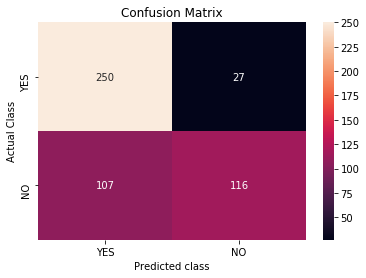

Number of True Positives (TP):  250
Number of True Negatives (TN):  116
Number of False Positives (FP):  107
Number of False Negatives (FN):  27

Accuracy: 73.2 %
Precision: 75.0 %
Recall: 73.2 %
F1 Score: 72.0 %


In [98]:
get_metrics(true_labels=test_y_full, predicted_labels=predicted_y_full_tfidf)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 73.2% here.</li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 75% here. It says that 75% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 73.2% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 73.2% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 72% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 134 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y).</p>

In [99]:
get_errors(test_X=test_X_full, test_y=test_y_full, predicted_y=predicted_y_full_tfidf)

yi
Actual Label: YES
Predicted Label: NO


3
Sentence: Badagini wela harak relata wal miti 225 kapala gihin dahalla atakota oya enaganna eka nawttaganiivi
Actual Label: YES
Predicted Label: NO


4
Sentence: අපි ඉල්ල වෙනස මල සින්දුකාරයි ඔබ අවධාන පිණිස
Actual Label: YES
Predicted Label: NO


5
Sentence: දහ කතිකාවත අැතිව්නෙ කල පස්සෙ සිංහ අපි දහමෙ ඈ කරා මෙි හොර නඩෙි වාසියිනෙ එ්ක මෙි බ ක හර මොර දේන්නෙ
Actual Label: YES
Predicted Label: NO


6
Sentence: මෙ හිත ඉ මේ කර ලන්කා කි කාර්දේෂ වෙ වෙන්නැ අරු එක හරිය කුණුහරුප රැප න
Actual Label: YES
Predicted Label: NO


7
Sentence: Lankawe wage political majarayo innakam police quality eka wadi karanna baha
Actual Label: YES
Predicted Label: NO


8
Sentence: 4 simawata giya eka hatharak reka genimata noheki unaa
Actual Label: YES
Predicted Label: NO


9
Sentence: Mewa gobba weda ban desapalanayata kade yama saha athata atha dimai kiyanne dekak anika desapalakayata wirodaya panne thawa ekekta kade yanagaman newe
Actual Label: YES
Predicted Label: NO

<p>Let us find the important and least important words from the model.</p>

In [100]:
log_reg_coeff_top_full_tfidf, log_reg_coeff_bottom_full_tfidf = find_important_words(
                                                                        feature_names=tf_idf_feature_names_full,
                                                                        log_reg_model=logistic_regression_model_full_tfidf)

In [101]:
log_reg_coeff_top_full_tfidf

,feature_names,model_coefficient
2854,ගහ,2.146696
3144,තම්බි,1.926866
5206,වේස,1.911559
3733,පක්,1.862277
2589,කාලකන්,1.762615
4372,මර,1.636590
4619,යක,1.561566
3736,පක්කු,1.560090
5588,හුත්ත,1.471276
4967,වල,1.419785


<p>As you can see above tokens have high coefficient values. Thus those are important tokens that has a high influence in hate speech.</p>

In [102]:
log_reg_coeff_bottom_full_tfidf

,feature_names,model_coefficient
2132,එකක්,-0.865586
3629,නියම,-0.902066
483,godak,-0.930559
1695,අහ,-0.950679
4350,මනුස්ස,-0.967981
962,nisa,-0.968734
4356,මම,-0.983256
4865,ලස්සන,-1.000209
556,hoda,-1.298398
2269,ඔබ,-1.427348


<p>As you can see above tokens have low coefficient values. Thus those are least important tokens that has a low influence in hate speech.</p>

#### f.2. Using semantic embeddings instead of bag-of-word vectors for word representation to model the data

<p>Here 2 methods will be considered. The first one is <b>Using word2vec model with tfidf weighted averaged vectorizer</b> and the second method is <b>Using doc2vec</b></p>

#####  Using word2vec model with tfidf weighted averaged vectorizer

<p>Package gensim consist the tools to build a word2vec model as follows.</p>

In [104]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.
ERROR: pmdarima 1.8.0 has requirement Cython<0.29.18,>=0.29, but you'll have cython 0.29.21 which is incompatible.


In [106]:
pip install python-Levenshtein

  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-win_amd64.whl size=80315 sha256=a36608e25ea3177c0f918cbeb93ed9cbdfde4bc4b94145f2f290f90bc16dd215
  Stored in directory: c:\users\kavishka\appdata\local\pip\cache\wheels\05\5f\ca\7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
Note: you may need to restart the kernel to use updated packages.


In [108]:
import gensim

In [109]:
# The train and test data was converted to list of strings since word2vec requires that
train_corpus = [" ".join(x) for x in train_X_full]
test_corpus = [" ".join(x) for x in test_X_full]  

In [112]:
# Build word2vec model with the following parameters                  
model = gensim.models.Word2Vec(train_corpus,
                               vector_size=500,
                               window=100,
                               min_count=30,
                               epochs=10,
                               sample=1e-3) 

<p>Let us get the tfidf features for training set as below.</p>

In [113]:
tfidf_vectorizer, tfidf_feature_names, tfidf_vocabulary, tfidf_train_features = get_tfidf_features(
                                                                                            data=train_X_full)

In [114]:
# Vectorize the test data using the above created tfidf vectorizer
tfidf_test_features = tfidf_vectorizer.transform(test_corpus) 

<p>Two special function should be used which is from Lab Session 8 of this course which can be used to find the tfidf weighted average word vectors. Those functions are defined below as <b>tfidf_wtd_avg_word_vectors(words, tfidf_vector, tfidf_vocabulary, model, num_features)</b> and <b>tfidf_weighted_averaged_word_vectorizer(corpus, tfidf_vectors, tfidf_vocabulary, model, num_features)</b></p>

In [117]:
# Using tfidf weighted average of word vectors in a document              
def tfidf_wtd_avg_word_vectors(words, tfidf_vector, tfidf_vocabulary, model, num_features):
    
    word_tfidfs = [tfidf_vector[0, tfidf_vocabulary.get(word)] 
                   if tfidf_vocabulary.get(word) 
                   else 0 for word in words]    
    word_tfidf_map = {word:tfidf_val for word, tfidf_val in zip(words, word_tfidfs)}
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    vocabulary = set(model.index_to_key)
    wts = 0.
    for word in words:
        if word in vocabulary: 
            word_vector = model[word]
            weighted_word_vector = word_tfidf_map[word] * word_vector
            wts = wts + word_tfidf_map[word]
            feature_vector = np.add(feature_vector, weighted_word_vector)
    if wts:
        feature_vector = np.divide(feature_vector, wts)
        
    return feature_vector
    
def tfidf_weighted_averaged_word_vectorizer(corpus, tfidf_vectors, 
                                   tfidf_vocabulary, model, num_features):
                                       
    docs_tfidfs = [(doc, doc_tfidf) 
                   for doc, doc_tfidf 
                   in zip(corpus, tfidf_vectors)]
    features = [tfidf_wtd_avg_word_vectors(tokenized_sentence, tfidf, tfidf_vocabulary,
                                   model, num_features)
                    for tokenized_sentence, tfidf in docs_tfidfs]
    return np.array(features) 

<p>tfidf weighted averaged word vector features for train and test sets can be obtained as below.</p>

In [118]:
# Obtaining tfidf weighted averaged word vector features
tfidf_wv_train_features = tfidf_weighted_averaged_word_vectorizer(corpus=train_X_full, 
                                                                  tfidf_vectors=tfidf_train_features, 
                                                                  tfidf_vocabulary=tfidf_vocabulary, 
                                                                  model=model.wv, 
                                                                  num_features=500)
tfidf_wv_test_features = tfidf_weighted_averaged_word_vectorizer(corpus=test_X_full, 
                                                                 tfidf_vectors=tfidf_test_features, 
                                                                 tfidf_vocabulary=tfidf_vocabulary, 
                                                                 model=model.wv, 
                                                                 num_features=500)

<p>Let us apply Logistic Regression to the dataset as shown below by passing the tfidf weighted averaged word vector features created previously and the train labels for the dataset.</p>

In [119]:
logistic_regression_model_word2vec = train_logistic_regression_model(features=tfidf_wv_train_features, labels=train_y_full)

Training the logistic regression model...
Finished


In [120]:
predicted_y_word2vec = predict_logistic_regression_model(test_X=tfidf_wv_test_features, 
                                                        test_y=test_y_full, 
                                                        vectorizer=None, 
                                                        logistic_regression_model=logistic_regression_model_word2vec)

Predictions: 
['NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' '

<p>Let us get the confusion matrix and the performance measures for Sinhala dataset.</p>

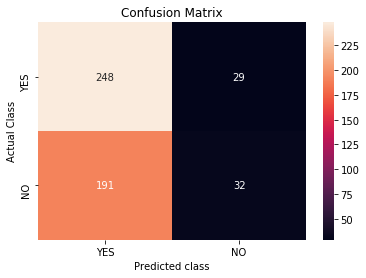

Number of True Positives (TP):  248
Number of True Negatives (TN):  32
Number of False Positives (FP):  191
Number of False Negatives (FN):  29

Accuracy: 56.00000000000001 %
Precision: 54.7 %
Recall: 56.00000000000001 %
F1 Score: 48.4 %


In [121]:
get_metrics(true_labels=test_y_full, predicted_labels=predicted_y_word2vec)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is  53.8% here.</li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 50.3% here. It says that 50.3% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 53.8% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 53.8% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 46.5% which is a reasonable value.</li>
</ul>

<br>This model is <b>useless</b>, so as a slution let us move on to doc2vec to create another model.</p>

#####  Using doc2vec model with tfidf weighted averaged vectorizer

<p>This is a complex task when compared to other models. First the required libraries are imported as below.</p>

In [122]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
import multiprocessing
from tqdm import tqdm
from sklearn import utils

<p>Let us split the merged dataframe which was created in question (d) to test and train sets with 80:20 ratio by converting them to lists in order to be iterated in the next steps to create training and testing documents as lists.</p>

In [123]:
train_X, test_X, train_y, test_y = train_test_split(
    dataframe['Phrase'].tolist(), dataframe['IsHateSpeech'].tolist(), test_size = 0.2, random_state=0)

<p>Below function named <b>create_train_test_documents(train_X, test_X, train_y, test_y)</b> will return the training and testing documents by appending the lables of each sentence to the back of the row as a tag.</p>

In [124]:
# Define a function to create train and test documents as lists
def create_train_test_documents(train_X, test_X, train_y, test_y):
    
    # Initialize empty lists
    train_documents = []
    test_documents = []

    # Append the train labels to the back of the train sentences
    for index in range(0,len(train_X)):
        y_list = []
        y_list.append(train_y[index])
        train_documents.append(TaggedDocument(words = train_X[index], tags = y_list))
        
    # Append the test labels to the back of the test sentences
    for index in range(0,len(test_X)):
        y_list = []
        y_list.append(test_y[index])                      
        test_documents.append(TaggedDocument(words = test_X[index], tags = y_list))
    
    return train_documents, test_documents

<p>Let us create the training and testing documents using the above function.</p>

In [125]:
train_documents, test_documents = create_train_test_documents(train_X=train_X, 
                                                              test_X=test_X, 
                                                              train_y=train_y, 
                                                              test_y=test_y)

In [78]:
# train_documents

In [79]:
# test_documents

<p>Next, we initialize the gensim doc2vec model and train for 20 epochs. In here dm=1 means that the PV-DM (Distributed Memory Model of Paragraph Vectors) was used and the vector_size (dimensionality of the feature vector) was used as 300. Number of cores of the cpu of the machine was retrieved and assigned to workers in order to do parallel processing. Information about the other parameters can be found here <a href="https://radimrehurek.com/gensim/models/doc2vec.html">https://radimrehurek.com/gensim/models/doc2vec.html</a></p>

In [126]:
# Retieving the number of cpu cores
cores = multiprocessing.cpu_count()

# Initialize the distributed bag-of-words model (DBOW) with the parameters discussed above.
model_dbow = Doc2Vec(dm=1, vector_size=250, 
                     negative=5, hs=0, min_count=2, 
                     sample = 0, workers=cores, 
                     alpha=0.025, min_alpha=0.001)
model_dbow.build_vocab([x for x in tqdm(train_documents)])

train_documents  = utils.shuffle(train_documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=20)

100%|██████████| 2000/2000 [00:00<00:00, 1003422.01it/s]


<p>Below function named <b>vector_for_learning(model, input_docs)</b> take the created doc2vec model and the input documents to get the feature vectors ro be fed to the logisitic regression model.</p>

In [127]:
# Define a function to create vectors to  passed to logistic regression model
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

<p>Let us get the feature vactors for training and testing sets using the above function as shown below.</p>

In [128]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

<p>Let us apply Logistic Regression to the dataset as shown below by passing the features created previously and the train labels the full dataset.</p>

In [129]:
logistic_regression_model_doc2vec = train_logistic_regression_model(features=X_train, labels=y_train)

Training the logistic regression model...
Finished


<p>Let us apply the above function to evaluate the model with test data as below.</p>

In [130]:
predicted_y_doc2vec = predict_logistic_regression_model(test_X=X_test, 
                                                        test_y=y_test, 
                                                        vectorizer=None, 
                                                        logistic_regression_model=logistic_regression_model_doc2vec)

Predictions: 
['YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'

<p>Let us get the confusion matrix and the performance measures for this model.</p>

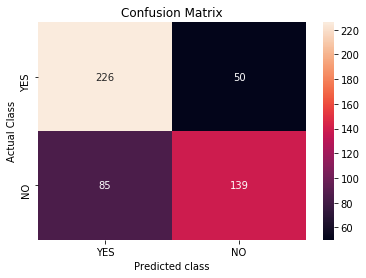

Number of True Positives (TP):  226
Number of True Negatives (TN):  139
Number of False Positives (FP):  85
Number of False Negatives (FN):  50

Accuracy: 73.0 %
Precision: 73.1 %
Recall: 73.0 %
F1 Score: 72.7 %


In [131]:
get_metrics(true_labels=test_y, predicted_labels=predicted_y_doc2vec)

<p> Let us interpret the above results obtained.
<ul>
    <li><b>Accuracy</b> is the fraction of predictions that our model got right. It is 74.2% here. </li>
    <li><b>Precision</b> indicates the proportion of the instances that the model says was relevant, actually were relevant. It is 74.2% here. It says that 74.2% which were predicted as hate speech is actually hate speech.</li>  
   <li><b>Recall</b> indicates the proportion of actually positive instances that are correctly predicted. It is 74.2% here. It says that of all the observations which truly consist of hate speech, we have correctly predicted 74.2% out of it.</li> 
    <li><b>F1 Score</b> considers both precision and recall. It is the harmonic mean (average) of the Precision and Recall. F1 Score is best if there is some sort of balance between Precision  and Recall in the system as above. The F1 Score for this model is 74.0% which is a reasonable value.</li>
</ul>

<br>The reason to the increment of FPs over FNs is that this data set consists of more number of "YES" labeled data than "NO" labeled data. According to the confusion matrix there are 150 errors (FP+FN). Those errors can be retrieved using the below function named <b>get_errors(test_X, test_y, predicted_y)</b>. </p>

In [132]:
get_errors(test_X=pd.Series(test_X), test_y=pd.Series(test_y), predicted_y=predicted_y_doc2vec)

in karana welawak newei
Actual Label: YES
Predicted Label: NO


15
Sentence: මෙිරටෙි ඉන්න ඒවුන්ට මෙිවා හරියන්නේ නැහැ ඔය ටික සත්යෙන් සුද්ද කරයි සිට් වල ලවි හැලි ලියයි හුණු සිටිවල උලයි පසුපෙල යන ජොඩු කිම ආශාවන් සපුරාගෙන ඹය දාලා තියෙන කර්ටන් වලින් කැරි ටික ප්හ්දායි
Actual Label: YES
Predicted Label: NO


16
Sentence: මේ කරන්න දෙයින් ත් රීරෝද රියදුරන් ගෙ මනුෂ් යත්වය පෙන්නන්න හැදුවට මේ කාලකන්නි බූරුවගෙ මනුස්සකම නෑ ඒ මිනිසුන්ව හදුන්වල දෙන්න
Actual Label: YES
Predicted Label: NO


17
Sentence: කිසිම කෙනෙක් තමන්ගේ ආගම හරියට අදහන්නේ නැහැ මුස්ලිම් බෞද්ධ හෝ කතෝලික හැමෝම තමන්ගේ වාසියට ආගම හරවගෙන
Actual Label: YES
Predicted Label: NO


18
Sentence: ඇත්තටම මෙහෙමතමයි කරන්න ඕනි මේවගේ තමන්ගෙ ජීවිත අවධානම ගැනවත් නොහිතා වැඩ කරන මිනිස්සු අග තිරීම තුළින් අනිත් අයද එලෙස කටයුතු කරනු ඇති
Actual Label: NO
Predicted Label: YES


19
Sentence: Meeta pasu lankawe chandayak awashshmanatha Mewage vihilu monaratakawath nathuwa athi
Actual Label: YES
Predicted Label: NO


20
Sentence: ඉරාජ් ලංකාවේ වගේ රටකට හරියන youtu

### Answer (g)

<p>In this assignment several models have been created. Thoss can be named as below.</p>
<ol>
<li><b>Model A</b>: Using bag-of-words features for Sinhala dataset (question (c))</li>
<li><b>Model B</b>: Using bag-of-words features for Singlish dataset (question (c))</li>
<li><b>Model C</b>: Using bag-of-words features for Full dataset (question (d))</li>
<li><b>Model D</b>: Using tfidf features for Full dataset with cross validation (question (e))</li>
<li><b>Model E</b>: Using tfidf features for Full dataset without cross validation (question (e))</li>
<li><b>Model F</b>: Using bag-of-ngrams with tfidf (question (f))</li>
<li><b>Model G</b>: Using word2vec model with tfidf weighted averaged vectorizer (question (f))</li>
<li><b>Model H</b>: Using doc2vec model (question (f))</li>
</ol>

#### Interpreting the Performance

<p>Below table is a summary of the performance of all the above models.</p>

<table align='left'>
  <tr>
    <th></th>
    <th>Model A</th>
    <th>Model B</th>
    <th>Model C</th>
    <th>Model D</th>
    <th>Model E</th>
    <th>Model F</th>
    <th>Model G</th>
    <th>Model H</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>74.9 %</td>
    <td>68.89 %</td>
    <td>74.2 %</td>
    <td>66.96 %</td>
    <td>73.0 %</td>
    <td>73.2 %</td>
    <td>56.00%</td>
    <td>74.2 %</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>75.3 %</td>
    <td>68.4 %</td>
    <td>75.1 %</td>
    <td>72.22 %</td>
    <td>74.9 %</td>
    <td>75.0 %</td>
    <td>54.9%</td>
    <td>74.2 %</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>74.9 %</td>
    <td>68.89 %</td>
    <td>74.2 %</td>
    <td>41.69 %</td>
    <td>73.0 %</td>
    <td>73.2 %</td>
    <td>56.00%</td>
    <td>74.2 %</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>74.7 %</td>
    <td>67.2 %</td>
    <td>73.4 %</td>
    <td>50.86 %</td>
    <td>71.7 %</td>
    <td>72.0 %</td>
    <td>47.19%</td>
    <td>74.0 %</td>
  </tr>
</table>

<ul>
<li>The higher performance was given by <b>Model A</b> because it was trained by the thoroughly preprocessed
 Sinhala dataset.</li>
<li>The <b>Model B</b> has a low performance than A because it consists more noise which we did not
clean.</li>
<li>But <b>Model C</b> has a reasonable performance when compared to B. Since it uses both datasets the performance of this model is commendable. Even when comparing the number of mistakes and important words
this can be further proved. (Please refer outputs of previous questions)</li>
</ul>

<ul>
<li>For further tasks the full dataset was used.</li>
<li><b>Model D</b> used tfidf features and it is special here since it was cross validated. But the cross validation was
resulted in overfitting as discussed in question (e).</li>
<li>So the same kind of a model was created as <b>Model E</b> using tfidf features but without cross validation
and has given better performance than the earlier one.</li>
<li><b>Model F</b> increased the performance of the previous model when the ngrams (unigrams and bigrams) was used with tfidf features.</li>
<li>Then a word2vec model was developed using word embeddings as <b>Model G</b> but has given low performance.</li>
<li>As a solution to that, <b>Model H</b> was created with doc2vec and has given higher performance. It can be further fine tuned in future by changing the parameters and etc. (Since this is out of scope of this assignment I did not do it.)</li>
</ul>

#### Solutions to Overfitting and effectively use the whole dataset to train a better Sinhala hate speech detector

<ul>
<li>We only used Logistic Regression here. But using SVM or another model the performance can be improved and the overfitting can be reduced.</li>
<li>Also if the number of data can be increased the overfitting can be reduced too.</li>
<li>Since this merged dataset had more Sinhala sentences, balancing the data set may also reduce overfiting and low performance.</li>
<li>By assigning the Regularization Parameters and doing trial and error can be a solution to reduce overfitting.</li>
<li>Preprocessing of the Singlish dataset should be done too. (Removing stop words, stemming and removing repeating characters)</li>
    <li>Combining classifiers may improve the performance such as using Modular approach (sometimes called as dynamic classifier selection technique) or Ensemble-based approach (classifier fusion technique).</li>
    <li>Bagging and Boosting techniques can be used too</li>
</ul>